<h1><center>CSEN1022:Assignment 3</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Salma ElSayed

GUC-ID:43-6801

Elective Tutorial No.: T4

**Member 2**

Name: Ali Elbadry

GUC-ID: 43-6833

Elective Tutorial No.: T2

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [ ]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create Classes

In [120]:
from numpy import random

class KMeansClustering:
    def __init__(self):
        self.membership=[]
        self.centroidsMatrix=[]
        self.dbi=[]

    def fit(self, x):
        #Repeat process 10 times in total.
        for i in range(10):
            membership, centroidsMatrix, dbi = self.fitHelper(x)
            self.membership.append(membership)
            self.centroidsMatrix.append(centroidsMatrix)
            self.dbi.append(dbi)
        self.membership= np.array(self.membership)
        self.centroidsMatrix= np.array(self.centroidsMatrix)
        self.centroidsMatrix= np.array(self.centroidsMatrix)

    def fitHelper(self, x):
        #Initialize the membership vector, the centroids matrix and the dbi value.
        membership, centroidsMatrix, dbi = np.zeros(len(x)), np.zeros(3*len(x[0])).reshape(3,len(x[0])), 0
        #Pick 3 random points to be centroids. (3,N)
        randomIndx0, randomIndx1, randomIndx2 =-1, -1, -1
        while(randomIndx0 ==randomIndx1 or randomIndx0 == randomIndx2 or randomIndx1 == randomIndx2):
            randomIndx0 = np.random.choice(15000)
            randomIndx1 = np.random.choice(15000)
            randomIndx2 = np.random.choice(15000)
        centroidsMatrix[0] = x[randomIndx0]
        centroidsMatrix[1] = x[randomIndx1]
        centroidsMatrix[2] = x[randomIndx2]
        #For each train image, calculate euclidean distance between this point and all 3 centroids
        #and obtain a membership vector consisting of 15,000 elements, each element is 0 or 1 or 2.
        #andupdate centroids 0, 1, 2
        currentMatrix = np.zeros(3*len(x[0])).reshape(3,len(x[0]))
        count0, count1, count2 = 0, 0, 0
        for i in range(len(x)):
            euclidean0 = np.sqrt(np.sum((x[i]-centroidsMatrix[0])**2))
            euclidean1 = np.sqrt(np.sum((x[i]-centroidsMatrix[1])**2))
            euclidean2 = np.sqrt(np.sum((x[i]-centroidsMatrix[2])**2))
            if(min(euclidean0, euclidean1, euclidean2) == euclidean0):
                membership[i]=0
                currentMatrix[0] = currentMatrix[0] + x[i]
                count0 = count0 + 1
            elif(min(euclidean0, euclidean1, euclidean2) == euclidean1):
                membership[i]=1
                currentMatrix[1] = currentMatrix[1] + x[i]
                count1 = count1 + 1
            else:
                membership[i]=2
                currentMatrix[2] = currentMatrix[2] + x[i]
                count2 = count2 + 1
            membership[i]=np.argmin([euclidean0, euclidean1, euclidean2])
        currentMatrix[0], currentMatrix[1], currentMatrix[2] = currentMatrix[0]/count0, currentMatrix[1]/count1, currentMatrix[2]/count2

        #Keep on repeating the previous steps till the centroids matrix stops changing (convergence)
        while(not((centroidsMatrix==currentMatrix).all())):
            centroidsMatrix=currentMatrix
            count0, count1, count2 = 0, 0, 0
            currentMatrix = np.zeros(3*len(x[0])).reshape(3,len(x[0]))
            for i in range(len(x)):
                euclidean0 = np.sqrt(np.sum((x[i]-centroidsMatrix[0])**2))
                euclidean1 = np.sqrt(np.sum((x[i]-centroidsMatrix[1])**2))
                euclidean2 = np.sqrt(np.sum((x[i]-centroidsMatrix[2])**2))
                if(min(euclidean0, euclidean1, euclidean2) == euclidean0):
                    membership[i]=0
                    currentMatrix[0] = currentMatrix[0] + x[i]
                    count0 = count0 + 1
                elif(min(euclidean0, euclidean1, euclidean2) == euclidean1):
                    membership[i]=1
                    currentMatrix[1] = currentMatrix[1] + x[i]
                    count1 = count1 + 1
                else:
                    membership[i]=2
                    currentMatrix[2] = currentMatrix[2] + x[i]
                    count2 = count2 + 1
            currentMatrix[0], currentMatrix[1], currentMatrix[2] = currentMatrix[0]/count0, currentMatrix[1]/count1, currentMatrix[2]/count2

        #Calculate DBI --> Max Rij --> [R01,R02,R12]
        #----------- R01 = (S0 + S1)/M01
        #----------- R02 = (S0 + S2)/M02
        #----------- R12 = (S1 + S2)/M12
        #----------- Where Si is the average of the sum of the euclidean distances between each centroid and all the points belonging to it.
        #----------- Where Mij is the distance between centeroid i and centroid of j
        S0 = 0
        count0 = 0
        S1 = 0
        count1 = 0
        S2 = 0
        count2 = 0
        for i in range(len(x)):
            if(membership[i] == 0):
                S0 = S0 + np.sqrt(np.sum((x[i]-centroidsMatrix[0])**2))
                count0 = count0 + 1
            elif(membership[i] == 1):
                S1 = S1 + np.sqrt(np.sum((x[i]-centroidsMatrix[1])**2))
                count1 = count1 + 1
            else:
                S2 = S2 + np.sqrt(np.sum((x[i]-centroidsMatrix[2])**2))
                count2 = count2 + 1
        S0 = S0/count0
        S1 = S1/count1
        S2 = S2/count2
        M01 = np.sqrt(np.sum((centroidsMatrix[0]-centroidsMatrix[1])**2))
        M02 = np.sqrt(np.sum((centroidsMatrix[0]-centroidsMatrix[2])**2))
        M12 = np.sqrt(np.sum((centroidsMatrix[1]-centroidsMatrix[2])**2))
        R01 = (S0 + S1)/M01
        R02 = (S0 + S2)/M02
        R12 = (S1 + S2)/M12
        dbi = max(R01, R02, R12)
        #Save the membership vector, the centroids matrix and the dbi value.
        return membership, centroidsMatrix, dbi

    def predict(self, point, centroids):
        euclidean0 = np.sqrt(np.sum((point-centroids[0])**2))
        euclidean1 = np.sqrt(np.sum((point-centroids[1])**2))
        euclidean2 = np.sqrt(np.sum((point-centroids[2])**2))
        return np.argmin([euclidean0, euclidean1, euclidean2])

## Read Data

In [ ]:
from google.colab import files
uploaded = files.upload()
!unzip Data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/truck/0.jpg  
  inflating: Data/train/truck/1.jpg  
  inflating: Data/train/truck/10.jpg  
  inflating: Data/train/truck/100.jpg  
  inflating: Data/train/truck/1000.jpg  
  inflating: Data/train/truck/1001.jpg  
  inflating: Data/train/truck/1002.jpg  
  inflating: Data/train/truck/1003.jpg  
  inflating: Data/train/truck/1004.jpg  
  inflating: Data/train/truck/1005.jpg  
  inflating: Data/train/truck/1006.jpg  
  inflating: Data/train/truck/1007.jpg  
  inflating: Data/train/truck/1008.jpg  
  inflating: Data/train/truck/1009.jpg  
  inflating: Data/train/truck/101.jpg  
  inflating: Data/train/truck/1010.jpg  
  inflating: Data/train/truck/1011.jpg  
  inflating: Data/train/truck/1012.jpg  
  inflating: Data/train/truck/1013.jpg  
  inflating: Data/train/truck/1014.jpg  
  inflating: Data/train/truck/1015.jpg  
  inflating: Data/train/truck/1016.jpg  
  inflating: Data/train/truck/1017.jpg  
  inflating: Dat

In [ ]:
y_actual=np.concatenate((np.zeros(1000), np.zeros(1000)+1, np.zeros(1000)+2))
def create_cm(y_actual, y_pred):
    cm=np.zeros((3,3))
    for i in range(len(y_pred)):
        real=int(y_actual[i])
        pred=int(y_pred[i])
        cm[real][pred]+=1
    return cm

In [ ]:
def read_train_rgb(name):
    #train_path = '/content/Data/train/'
    train_path = 'Data/train/'
    data = np.array([plt.imread(train_path+name+'/{}.jpg'.format(i)) for i in np.arange(0,5000)])
    data=data.reshape(-1,3072)
    #data=data/255
    return data
def read_test_rgb(name):
    #train_path = '/content/Data/train/'
    test_path = 'Data/test/'
    data = np.array([plt.imread(test_path+name+'/{}.jpg'.format(i)) for i in np.arange(0,1000)])
    data=data.reshape(-1,3072)
    #data=data/255
    return data
def create_labels(order):
    pos= np.ones(5000)
    neg =np.ones(5000)*-1
    if (order==0):
        labels = np.concatenate((pos,neg,neg))
    if order==1:
        labels = np.concatenate((neg,pos,neg))
    if order==2:
        labels = np.concatenate((neg,neg,pos))
    return labels

In [ ]:
airplane_train = read_train_rgb('airplane')
bird_train = read_train_rgb('bird')
truck_train = read_train_rgb('truck')

In [ ]:
airplane_test= read_test_rgb('airplane')
bird_test= read_test_rgb('bird')
truck_test= read_test_rgb('truck')

In [ ]:
airplane_t=create_labels(0)
bird_t=create_labels(1)
truck_t=create_labels(2)

In [ ]:
# return (x_train, y_train), (x_test, y_test)
x_train = np.concatenate((airplane_train,bird_train,truck_train))
x_test=np.concatenate((airplane_test,bird_test,truck_test))
y_train=np.concatenate((airplane_t,bird_t,truck_t))

<hr style="border:2px solid black"> </hr>

# Perform K means clustering for all 3 classes (Training Data).
### Return (memberships, centroids, dbi) --> (vector, matrix, scalar value).

In [121]:
kMeans = KMeansClustering()
kMeans.fit(x_train)
membership10Times = kMeans.membership
centroidsMatrix10Times = kMeans.centroidsMatrix
dbi10Times = kMeans.dbi

In [122]:
centroidsMatrix10Times[0]

array([[177.54128615, 189.043379  , 197.49257991, ..., 120.93835616,
        119.46613394, 109.23972603],
       [ 94.63125322, 102.33849063,  93.94361355, ..., 107.57331958,
        107.91456077,  93.96321128],
       [177.97249809, 192.41074612, 203.43366437, ..., 180.95365419,
        186.49910873, 188.32034632]])

In [123]:
centroidsMatrix10Times.shape

(10, 3, 3072)

In [124]:
dbi10Times

[2.2777332511399777,
 2.274731149143191,
 2.274288496001043,
 2.2777332511399777,
 2.275868677714488,
 2.274288496001043,
 2.2743363160231818,
 2.2758485779643984,
 2.2777332511399777,
 2.2778421309027905]

<hr style="border:2px solid black"> </hr>

# Repeat the previous process 10 times. 
### Pick the membership vector and the centroids matrix corresponding to the best dbi.
##### Make sure you return max_counts and confusion_matrix.
(keep history in whatever datastructure you like).

In [125]:
best_dbi_idx = np.argmin(dbi10Times)
best_membership_matrix = membership10Times[best_dbi_idx]
best_centroids = centroidsMatrix10Times[best_dbi_idx]
best_dbi = dbi10Times[best_dbi_idx]

###
#CODE HERE#
###
print(best_membership_matrix.shape)
print(best_centroids.shape)
print(best_dbi)

(15000,)
(3, 3072)
2.274288496001043


In [126]:
print(np.bincount(best_membership_matrix[0:5000].astype('int64')))  ##airplanes
print(np.bincount(best_membership_matrix[5000:10000].astype('int64'))) ##bird
print(np.bincount(best_membership_matrix[10000:15000].astype('int64'))) ## truck

[1499 1314 2187]
[ 843 3015 1142]
[2886 1487  627]


In [127]:
max_counts = [np.max(np.bincount(best_membership_matrix[0:5000].astype('int64'))),np.max(np.bincount(best_membership_matrix[5000:10000].astype('int64'))) ,np.max(np.bincount(best_membership_matrix[10000:15000].astype('int64')))]
max_counts

[2187, 3015, 2886]

In [128]:
def cluster_to_class(cluster_no):
    count0 = np.bincount(best_membership_matrix[0:5000].astype('int64'))  
    count1 = np.bincount(best_membership_matrix[5000:10000].astype('int64')) 
    count2 = np.bincount(best_membership_matrix[10000:15000].astype('int64'))
    c0=np.argmax(count0)
    count1[c0] = -1
    count2[c0] = -1
    c1 = np.argmax(count1)
    count2[c1] = -1
    c2 = np.argmax(count2)
#     print(count0)
#     print(count1)
#     print(count2)
    if cluster_no==c0:
        return 0
    if cluster_no==c1:
        return 1
    if cluster_no==c2:
        return 2

In [129]:
cluster_preds = []
class_preds=[]
for point in x_test:
    pred = kMeans.predict(point,best_centroids)
    cluster_preds.append(pred)
    class_preds.append(cluster_to_class(pred))
cluster_preds = np.array(cluster_preds)
class_preds = np.array(class_preds)

In [130]:
np.bincount(cluster_preds)

array([1011, 1134,  855])

In [131]:
confusion_matrix=create_cm(y_actual, class_preds)

<hr style="border:2px solid black"> </hr>

## Don't Edit the Following Cells, Just Run & Save them.

Text(0.5, 1.0, 'Best Counts')

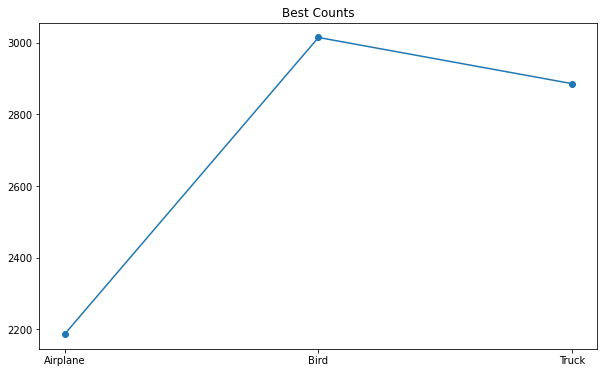

In [132]:
plt.figure(figsize=(10,6))
plt.plot(['Airplane','Bird','Truck'],max_counts,'-o')
plt.title('Best Counts')

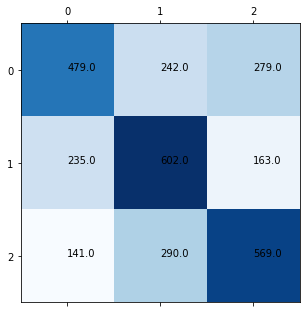

In [133]:
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))